In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn
from sklearn.feature_extraction.text import CountVectorizer

In [63]:
df = pd.read_csv("new_df.csv",index_col=0).dropna()

In [121]:
df_sub = df.sample(10000)

### Data Processing

#### Percentages of Each Label in Subsample

In [ ]:
for i in range(0,7):
    print("Percentage of",np.unique(le.inverse_transform(y[y==i])),"labels in subsample:",(len(y[y==i])/len(y)*100))

#### Converting strings into binary numbers.

In [129]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import KFold
from sklearn import linear_model
from sklearn.model_selection import StratifiedKFold
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.cluster import KMeans
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix

In [122]:
X = df_sub.drop(["country"],axis='columns')
drop_enc = OneHotEncoder(drop='first').fit(X)
X = pd.DataFrame(drop_enc.transform(X).toarray())
y = np.array(df_sub['country'])
le = LabelEncoder()
le.fit(y)
y = le.transform(y)
print("Numeric labels:",np.unique(y))
print("Original labels:", np.unique(le.inverse_transform(y)))

Numeric labels: [0 1 2 3 4 5 6]
Original labels: ['Argentina' 'Australia' 'Canada' 'France' 'Italy' 'Spain' 'US']


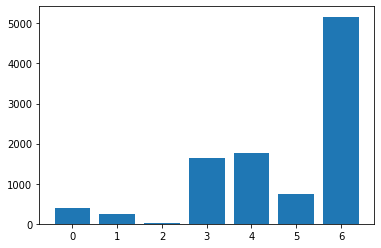

6    5167
4    1777
3    1654
5     735
0     386
1     250
2      31
Name: 0, dtype: int64


In [123]:
plt.bar(height = pd.DataFrame(y)[0].value_counts(), x = pd.DataFrame(y)[0].value_counts().index)
plt.show()
print(pd.DataFrame(y)[0].value_counts())

#### Random Forest with K-Fold Cross Validation

In [143]:
kf = StratifiedKFold(n_splits=3)
f1_scores = []
cm = np.zeros((7,7))

for train_index, test_index in kf.split(X,y):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y[train_index], y[test_index]
    clf= RandomForestClassifier(n_estimators=10,max_features=None)
    clf.fit(X_train,y_train)
    y_pred = clf.predict(X_test)
    f1_scores.append(f1_score(y_pred,y_test,average='micro'))
    cm += confusion_matrix(y_pred,y_test)

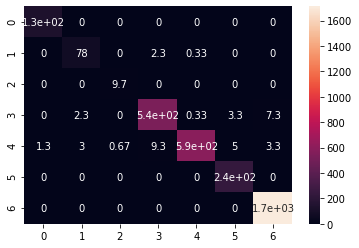

In [144]:
sn.heatmap(cm/3,annot=True)
plt.show()

In [145]:
print("F1 score:",np.mean(f1_scores))

F1 score: 0.9884002197460298


### Logistic Regression with K-Fold Cross Validation

In [147]:
kf = StratifiedKFold(n_splits=3)
f1_scores = []
cm = np.zeros((7,7))

for train_index, test_index in kf.split(X,y):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y[train_index], y[test_index]
    clf= LogisticRegression()
    clf.fit(X_train,y_train)
    y_pred = clf.predict(X_test)
    f1_scores.append(f1_score(y_pred,y_test,average='micro'))
    cm += confusion_matrix(y_pred,y_test)

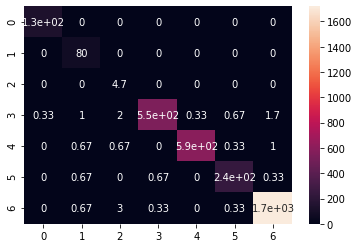

In [148]:
sn.heatmap(cm/3,annot=True)
plt.show()

In [149]:
print("F1 score:",np.mean(f1_scores))

F1 score: 0.9956001598960137


### K-Means Classification with K-Fold Cross Validation

In [150]:
kf = StratifiedKFold(n_splits=3)
f1_scores = []
cm = np.zeros((7,7))

for train_index, test_index in kf.split(X,y):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y[train_index], y[test_index]
    clf= KMeans(n_clusters=7)
    clf.fit(X_train,y_train)
    y_pred = clf.predict(X_test)
    f1_scores.append(f1_score(y_pred,y_test,average='micro'))
    cm += confusion_matrix(y_pred,y_test)

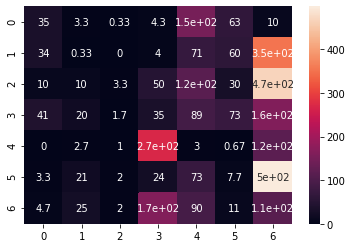

In [151]:
sn.heatmap(cm/3,annot=True)
plt.show()

In [152]:
print("F1 score:",np.mean(f1_scores))

F1 score: 0.05909625155676936
